# Airlines Data Analysis using SQL and Python

## Importing the Libraries

In [43]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

## Connecting the Database

##### Dataset taken from Kaggle (https://www.kaggle.com/datasets/saadharoon27/airlines-dataset)

In [21]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

#### Listing the table names in the dataset

In [22]:
cursor.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
print('List of tables in the database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of tables in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

## Data Exploration

In [23]:
aircrafts_data = pd.read_sql_query("SELECT * FROM aircrafts_data", connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [24]:
airports_data = pd.read_sql_query("SELECT * FROM airports_data", connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [25]:
boarding_passes = pd.read_sql_query("SELECT * FROM boarding_passes", connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [26]:
flights = pd.read_sql_query("SELECT * FROM flights", connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


#### Prints the table name and the columns in each table and its datatype

In [27]:
for table in table_list :
    print('\ntable:', table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

#### Check if the columns for missing values

In [28]:
for table in table_list :
    print('\ntable:', table)
    df_table = pd.read_sql_query(f"SELECT * FROM {table}", connection)
    print(df_table.isnull().sum())


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


#### How many planes have more than 100 seats?

In [29]:
pd.read_sql_query("""SELECT aircraft_code, COUNT(seat_no) as number_of_seats FROM seats 
                     GROUP BY aircraft_code HAVING number_of_seats > 100""", connection)

,aircraft_code,number_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


#### How the number of tickets booked and total amount oearned changed with time

In [30]:
tickets = pd.read_sql_query("""SELECT * FROM tickets 
                     INNER JOIN bookings ON tickets.book_ref = bookings.book_ref""", connection)

tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


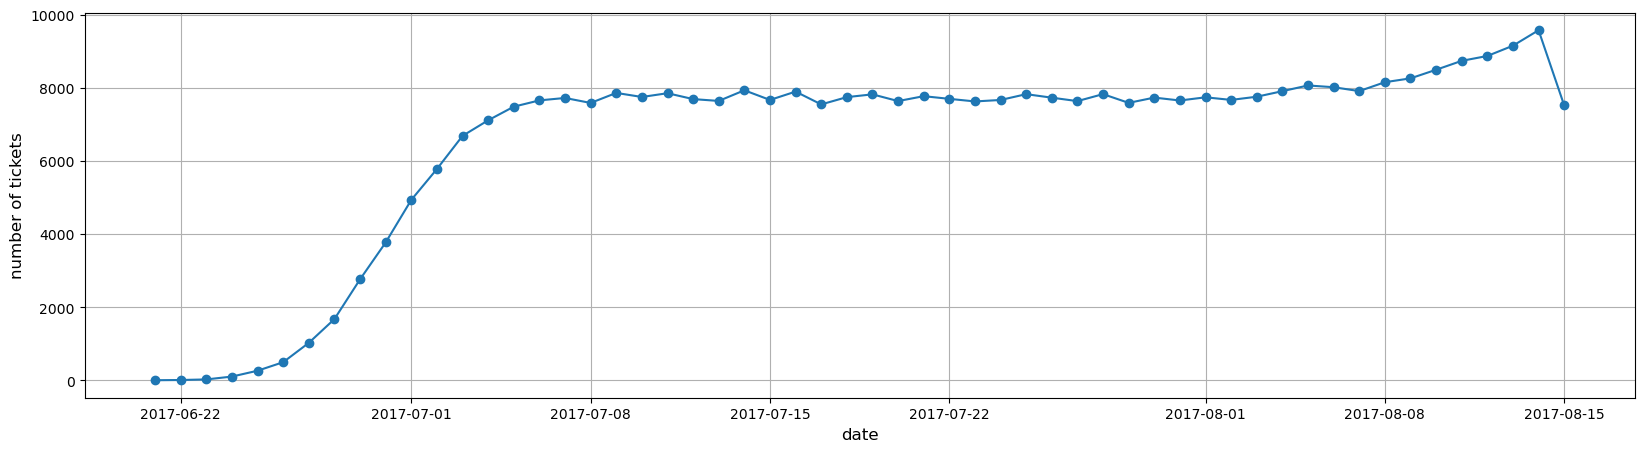

In [31]:
x = tickets.groupby('date')[['date']].count()
plt.figure(figsize = (20,5))
plt.plot(x.index,x['date'], marker = 'o')
plt.xlabel('date', fontsize = 12)
plt.ylabel('number of tickets', fontsize = 12)
plt.grid('b')
plt.show()

In [34]:
bookings = pd.read_sql_query("""SELECT * FROM bookings""", connection)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
bookings

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03:00,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,2017-08-07
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,2017-08-08


In [37]:
bookings.groupby('date')[['total_amount']].sum()

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


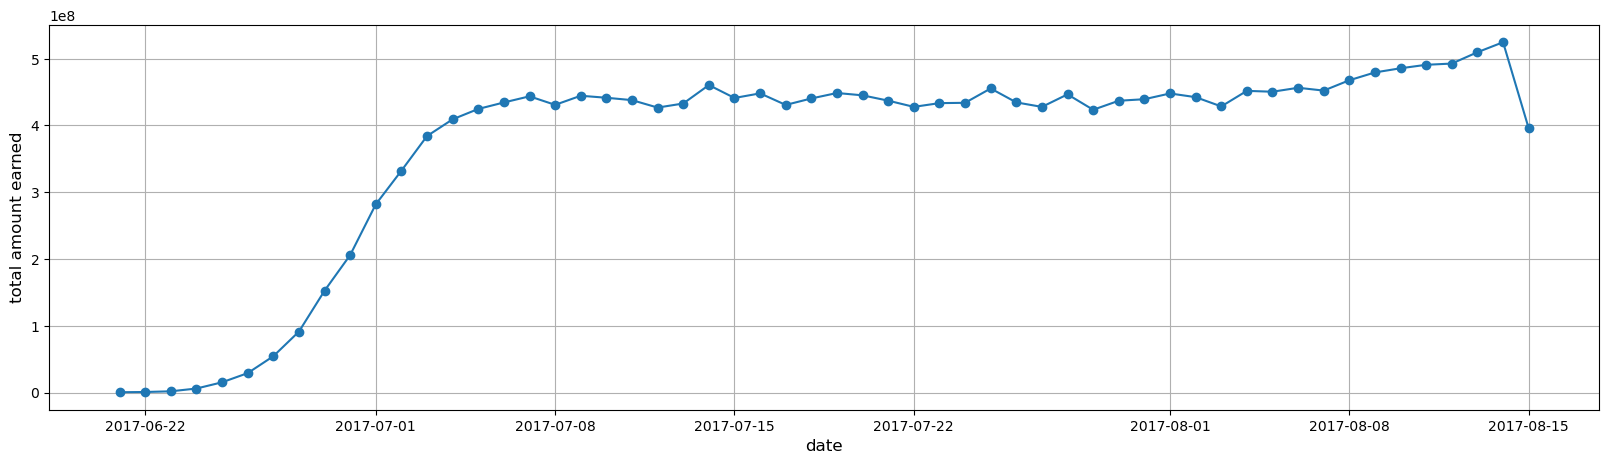

In [39]:
x = bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize = (20,5))
plt.plot(x.index,x['total_amount'], marker = 'o')
plt.xlabel('date', fontsize = 12)
plt.ylabel('total amount earned', fontsize = 12)
plt.grid('b')
plt.show()

### Calculate the average charges for the each aircraft with different fare conditions

In [42]:
df = pd.read_sql_query("""SELECT fare_conditions, aircraft_code, avg(amount) 
                          FROM ticket_flights JOIN flights ON ticket_flights.flight_id = flights.flight_id
                          group by aircraft_code, fare_conditions""", connection)
df

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


[Text(0.5, 0, 'Aircraft Code'),
 Text(0, 0.5, 'Average Amount'),
 Text(0.5, 1.0, 'Average Amount by Aircraft and Fare Conditions')]

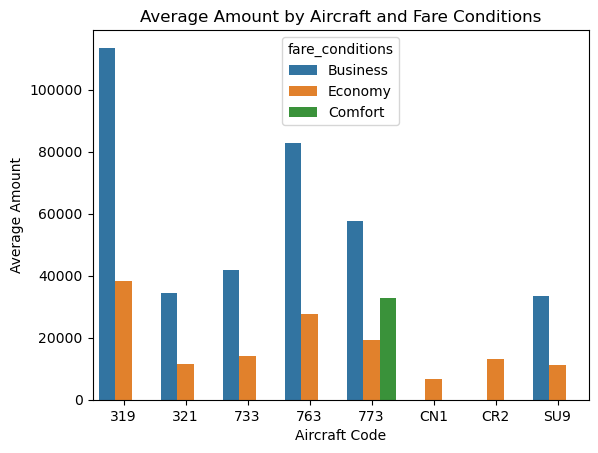

In [46]:
ax = sns.barplot(data = df, x = 'aircraft_code', y = 'avg(amount)', hue = 'fare_conditions' )
ax.set(xlabel='Aircraft Code', ylabel='Average Amount', title='Average Amount by Aircraft and Fare Conditions')

## Analysing the occupancy rate

### For each aircraft, calculate the total revenue per year and the average revenue per ticket

In [69]:
df = pd.read_sql_query("""SELECT aircraft_code, sum(amount) 
                          FROM ticket_flights JOIN flights ON ticket_flights.flight_id = flights.flight_id
                          group by aircraft_code""", connection)
df

,aircraft_code,sum(amount)
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


[Text(0.5, 0, 'Aircraft Code'),
 Text(0, 0.5, 'Total Amount'),
 Text(0.5, 1.0, 'Total revenue per Year ')]

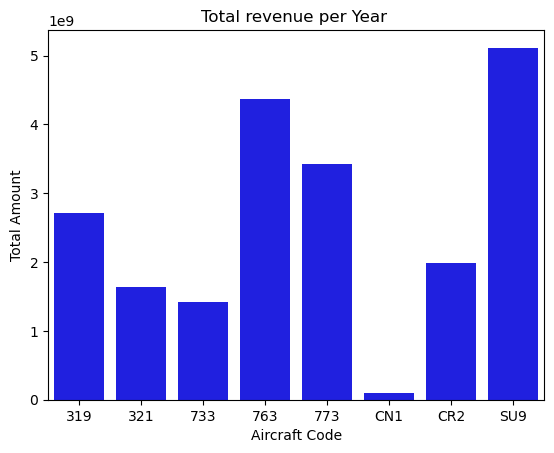

In [72]:
plot = sns.barplot(data = df, x = 'aircraft_code',y = 'sum(amount)', color = 'blue')
plot.set(xlabel='Aircraft Code', ylabel='Total Amount', title='Total revenue per Year ')

In [125]:
df = pd.read_sql_query("""SELECT aircraft_code, sum(amount)/count(ticket_flights.ticket_no) as average_rev 
                          FROM ticket_flights JOIN flights ON ticket_flights.flight_id = flights.flight_id
                          group by aircraft_code""", connection)
df

,aircraft_code,average_rev
0,319,51201
1,321,15291
2,733,16568
3,763,35033
4,773,23765
5,CN1,6568
6,CR2,13207
7,SU9,13985


[Text(0.5, 0, 'Aircraft Code'),
 Text(0, 0.5, 'avereage revenue per ticket'),
 Text(0.5, 1.0, 'average revenue per ticket for each aircraft')]

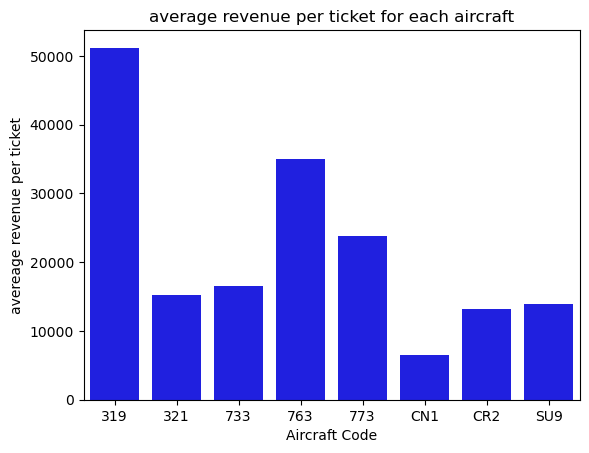

In [127]:
plot2 = sns.barplot(data = df, x = 'aircraft_code', y = 'average_rev', color = 'blue')
plot2.set(xlabel = 'Aircraft Code', ylabel = 'avereage revenue per ticket', title = 'average revenue per ticket for each aircraft')

In [138]:
df = pd.read_sql_query("""SELECT 
    aircraft_code, count(ticket_flights.ticket_no) as ticket_count, 
    SUM(amount) AS total_revenue, 
    SUM(amount) / COUNT(ticket_flights.ticket_no) AS average_rev 
FROM 
    ticket_flights 
    JOIN flights ON ticket_flights.flight_id = flights.flight_id
GROUP BY 
    aircraft_code;
""", connection)

df

,aircraft_code,ticket_count,total_revenue,average_rev
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


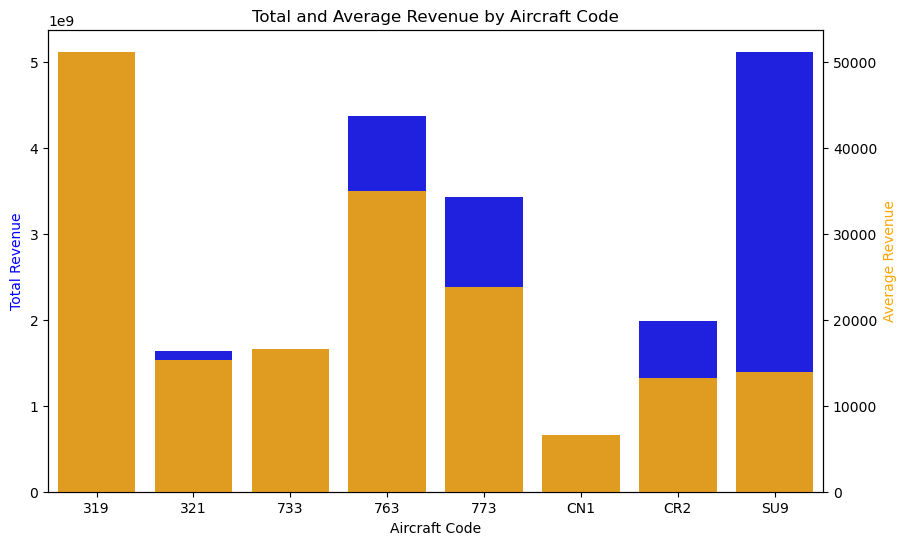

In [135]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total revenue on the left y-axis
sns.barplot(x='aircraft_code', y='total_revenue', data=df, label='Total Revenue', color='blue', ax=ax1)

# Adding labels and title for the left y-axis
ax1.set_xlabel('Aircraft Code')
ax1.set_ylabel('Total Revenue', color='blue')
ax1.set_title('Total and Average Revenue by Aircraft Code')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot average revenue on the right y-axis
sns.barplot(x='aircraft_code', y='average_rev', data=df, label='Average Revenue', color='orange', ax=ax2)

# Adding labels for the right y-axis
ax2.set_ylabel('Average Revenue', color='orange')

# Display the plot
plt.show()

### Calculate the average occupancy rate

In [130]:
df1 = pd.read_sql_query("""SELECT aircraft_code, count(seat_no) FROM seats
                          GROUP BY aircraft_code""", connection)
df1

,aircraft_code,count(seat_no)
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [117]:
SELECT a.aircraft_code, a.total_seats, b.total_boarded_seats
FROM (
    SELECT aircraft_code, COUNT(seat_no) AS total_seats
    FROM seats
    GROUP BY aircraft_code
) AS a
JOIN (
    SELECT s.aircraft_code, COUNT(bp.seat_no) AS total_boarded_seats
    FROM boarding_passes bp
    JOIN flights f ON bp.flight_id = f.flight_id
    JOIN seats s ON bp.seat_no = s.seat_no AND bp.aircraft_code = s.aircraft_code
    GROUP BY s.aircraft_code, f.flight_id
) AS b ON a.aircraft_code = b.aircraft_code;


SyntaxError: invalid syntax (3868362564.py, line 1)

In [182]:
df2 = pd.read_sql_query("""SELECT aircraft_code, avg(seats_booked) as seats_booked FROM
                           (SELECT aircraft_code,count(aircraft_code),boarding_passes.flight_id ,count(seat_no) as seats_booked FROM boarding_passes JOIN flights ON boarding_passes.flight_id=flights.flight_id
                            GROUP BY aircraft_code, flights.flight_id) 
                            GROUP BY aircraft_code""", connection)

df1 = pd.read_sql_query("""SELECT aircraft_code, count(seat_no) FROM seats
                          GROUP BY aircraft_code""", connection)
merged_df = pd.merge(df1, df2, on = 'aircraft_code', how = 'outer')
# Calculate the percentage of occupancy
merged_df['occupancy_percentage'] = (merged_df['seats_booked']/ merged_df['count(seat_no)']) * 100
merged_df

,aircraft_code,count(seat_no),seats_booked,occupancy_percentage
0,319,116,53.583181,46.192397
1,320,140,NaN,NaN
2,321,170,88.809231,52.240724
3,733,130,80.255462,61.734971
4,763,222,113.937294,51.323105
5,773,402,264.925806,65.901942
6,CN1,12,6.004431,50.036928
7,CR2,50,21.482847,42.965694
8,SU9,97,56.812113,58.569188


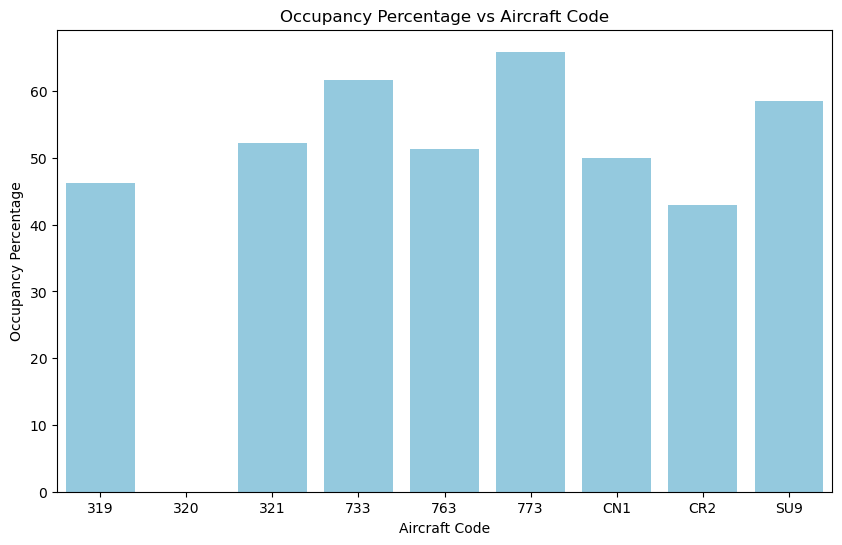

In [162]:
plt.figure(figsize=(10, 6))
sns.barplot(x='aircraft_code', y='occupancy_percentage', data=merged_df, color='skyblue')

# Adding labels and title
plt.xlabel('Aircraft Code')
plt.ylabel('Occupancy Percentage')
plt.title('Occupancy Percentage vs Aircraft Code')

# Display the plot
plt.show()

### Calculate by how much the total annual turnover could increase by fiving all aircraft a 10% higher occupancy rate.

In [183]:
merged_df['new_occupancy_rate'] = merged_df['occupancy_percentage'] * 1.1
merged_df

,aircraft_code,count(seat_no),seats_booked,occupancy_percentage,new_occupancy_rate
0,319,116,53.583181,46.192397,50.811637
1,320,140,NaN,NaN,NaN
2,321,170,88.809231,52.240724,57.464796
3,733,130,80.255462,61.734971,67.908468
4,763,222,113.937294,51.323105,56.455416
5,773,402,264.925806,65.901942,72.492136
6,CN1,12,6.004431,50.036928,55.040620
7,CR2,50,21.482847,42.965694,47.262263
8,SU9,97,56.812113,58.569188,64.426107


In [180]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code, sum(amount) as revenue, 1.1*sum(amount) as new_revenue, 0.1 * sum(amount) as margin_revenue
                          FROM ticket_flights JOIN flights ON ticket_flights.flight_id = flights.flight_id
                          group by aircraft_code""", connection)
total_revenue

,aircraft_code,revenue,new_revenue,margin_revenue
0,319,2706163100,2.976779e+09,270616310.0
1,321,1638164100,1.801981e+09,163816410.0
2,733,1426552100,1.569207e+09,142655210.0
3,763,4371277100,4.808405e+09,437127710.0
4,773,3431205500,3.774326e+09,343120550.0
5,CN1,96373800,1.060112e+08,9637380.0
6,CR2,1982760500,2.181037e+09,198276050.0
7,SU9,5114484700,5.625933e+09,511448470.0


In [184]:
new_revenue_table = pd.merge(total_revenue, merged_df, on = 'aircraft_code', how = 'outer')
new_revenue_table

,aircraft_code,revenue,new_revenue,margin_revenue,count(seat_no),seats_booked,occupancy_percentage,new_occupancy_rate
0,319,2.706163e+09,2.976779e+09,270616310.0,116,53.583181,46.192397,50.811637
1,321,1.638164e+09,1.801981e+09,163816410.0,170,88.809231,52.240724,57.464796
2,733,1.426552e+09,1.569207e+09,142655210.0,130,80.255462,61.734971,67.908468
3,763,4.371277e+09,4.808405e+09,437127710.0,222,113.937294,51.323105,56.455416
4,773,3.431206e+09,3.774326e+09,343120550.0,402,264.925806,65.901942,72.492136
5,CN1,9.637380e+07,1.060112e+08,9637380.0,12,6.004431,50.036928,55.040620
6,CR2,1.982760e+09,2.181037e+09,198276050.0,50,21.482847,42.965694,47.262263
7,SU9,5.114485e+09,5.625933e+09,511448470.0,97,56.812113,58.569188,64.426107
8,320,NaN,NaN,NaN,140,NaN,NaN,NaN


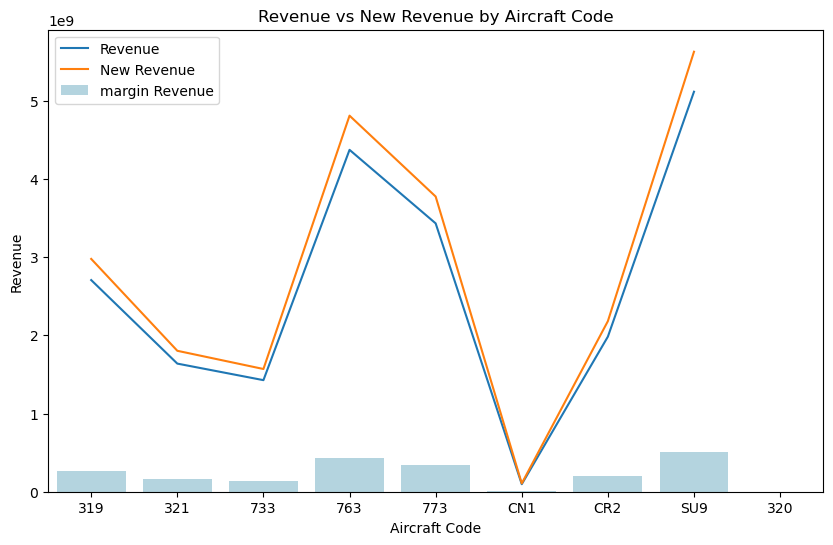

In [195]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=new_revenue_table, x='aircraft_code', y='revenue', label='Revenue')
sns.lineplot(data=new_revenue_table, x='aircraft_code', y='new_revenue', label='New Revenue')
sns.barplot(data=new_revenue_table, x='aircraft_code', y='margin_revenue', label='margin Revenue', color = 'lightblue')

# Adding labels and title
plt.xlabel('Aircraft Code')
plt.ylabel('Revenue')
plt.title('Revenue vs New Revenue by Aircraft Code')
plt.legend()

# Display the plot
plt.show()

In [114]:
df = pd.read_sql_query("""SELECT * FROM flights""", connection)
df

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


## Basic Analysis

### The basic analysis of the data provides insight into three important questions:

#### 1. How many planes had more than 100 seats?

#### These findings will help us to develop strategy to increase occupancy of the aircraft and optimise the pricing of each aircraft.

In [47]:
pd.read_sql_query("""SELECT aircraft_code, COUNT(seat_no) as number_of_seats FROM seats 
                     GROUP BY aircraft_code HAVING number_of_seats > 100""", connection)

,aircraft_code,number_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


### 2. How the number of tickets booked and total amount earned changed with time?

#### This line chart gives us a understanding that the number of tickets booked increased gradually during 22 June to 7 July  2017 and almost stays consistent from 8 July to August. It is also understandable that the total amount earned is a direct consequence of the number of tickets booked. So the trend lines look very similar for both the data. These findings suggest that analysing the factors that led to the increase in ticekt booking can be benefecial for increasing the overall revenue and optimising operational strategies.

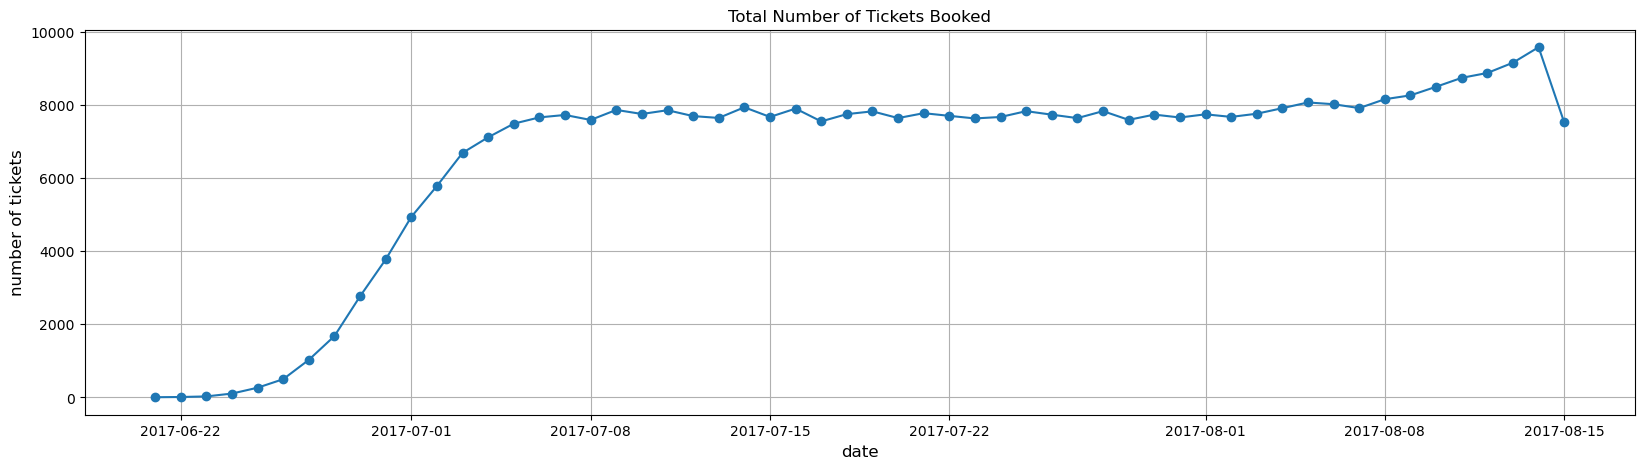

In [50]:
x = tickets.groupby('date')[['date']].count()
plt.figure(figsize = (20,5))
plt.plot(x.index,x['date'], marker = 'o')
plt.xlabel('date', fontsize = 12)
plt.ylabel('number of tickets', fontsize = 12)
plt.title('Total Number of Tickets Booked')
plt.grid('b')
plt.show()

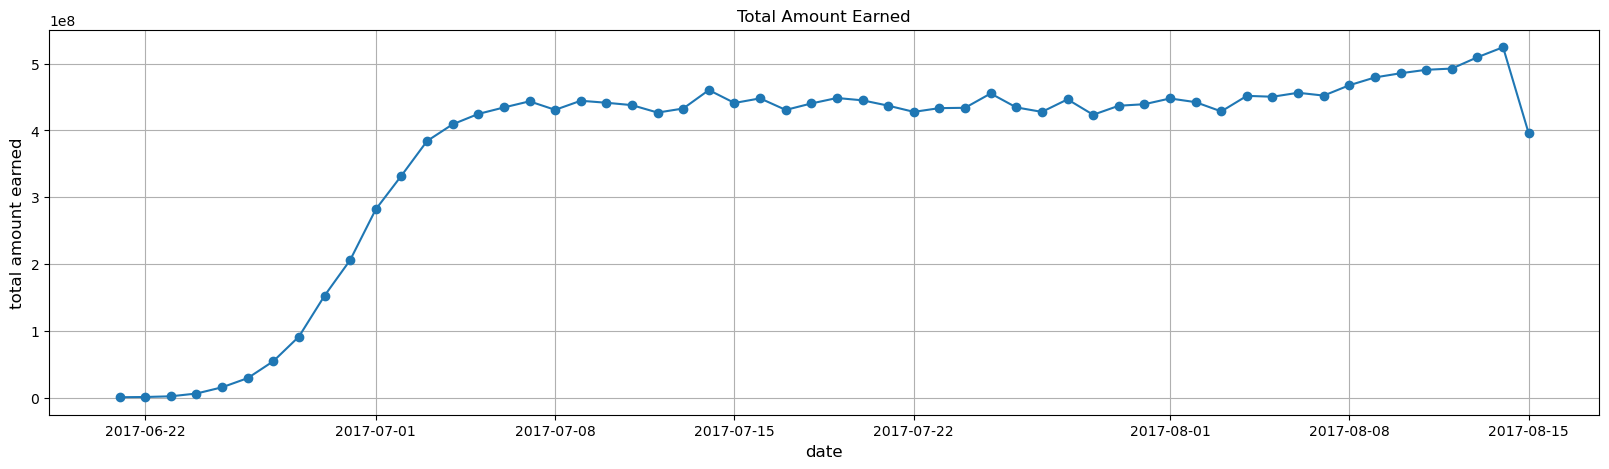

In [51]:
x = bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize = (20,5))
plt.plot(x.index,x['total_amount'], marker = 'o')
plt.xlabel('date', fontsize = 12)
plt.ylabel('total amount earned', fontsize = 12)
plt.title('Total Amount Earned')
plt.grid('b')
plt.show()

### Calculate the average charges for the each aircraft with different fare conditions

### We also analysed the different aircrafts and different fare conditions available. We note that the comfort class is only available in 773 aircraft. Whereas CN1 and CR2 had only Economy classes. All the other aircrafts provided with options between business class and economy class. The average amount for business class are consistently higher than the economy class regardless of the aircraft.

[Text(0.5, 0, 'Aircraft Code'),
 Text(0, 0.5, 'Average Amount'),
 Text(0.5, 1.0, 'Average Amount by Aircraft and Fare Conditions')]

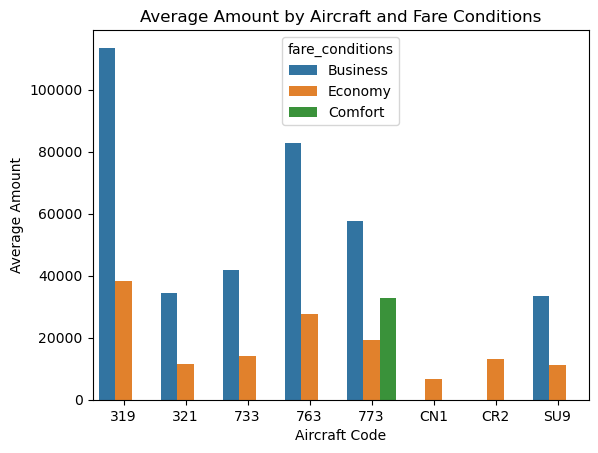

In [52]:
ax = sns.barplot(data = df, x = 'aircraft_code', y = 'avg(amount)', hue = 'fare_conditions' )
ax.set(xlabel='Aircraft Code', ylabel='Average Amount', title='Average Amount by Aircraft and Fare Conditions')